### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

#### Independent Variable:

The independent variable is the lists of words under two conditions: a congruent words condition, and an incongruent words condition.

#### Dependent Variable:
The dependent variable is the time it takes to name the ink colors in equally-sized lists. Each participant's recorded time from each condition.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

#### Null Hypothesis (Ho):

An appropriate Null Hypothesis is that the mean time it takes a participant to name the ink colors under the congruent words condition equals the mean time it takes a participant to name the ink colors under the incongruent words condition.

**$u_{congruent}$** - **$u_{incongruent}$** $= 0$


#### Alternative Hypothesis (Ha):

An appropriate Alternative Hypothesis is that the mean time it takes a participant to name the ink colors under the congruent words condition is not equal to the mean time it takes a participant to name the ink colors under the incongruent words condition.

**$u_{congruent}$** - **$u_{incongruent}$** $!= 0$

#### Statistical Test:


I expect to perform a dependent 2 sample T-test (paired).

I will perform this test because we are testing the same subject in 2 different conditions and comparing the results. This is a within-subject test scenario.

#### Test Assumptions

- The first assumption made is that of a simple random sample, that the data is collected from a representative, randomly selected portion of the total population.
- The second assumption is that the data, when plotted, results in a normal distribution, bell-shaped distribution curve.
- The third assumption is that a reasonably large sample size is used. A larger sample size means that the distribution of results should approach a normal bell-shaped curve.
- The final assumption is homogeneity of variance. Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal.



In [33]:
# Import libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set(color_codes=True)

df=pd.read_csv('stroopdata.csv')
df.head(5)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [34]:
# Get dataset basic statistics
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


#### Descriptive Statistics 

The test data for 24 participants is available in this dataset. 

The mean time for the participants to complete the congruent list is 14.05s, while the mean time for the incongruent list is 22.02s.

The standard deviation among the times to complete the congruent list is 3.56s, while the standard deviation among the times to complete the incongruent list is 4.80s.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0.5,0,'Time to complete in seconds')

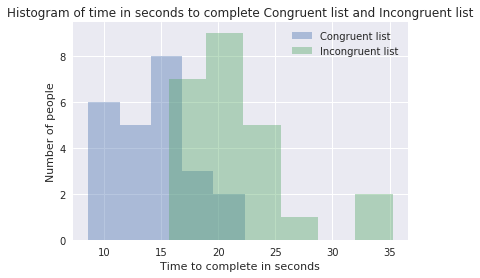

In [39]:
# Build the visualizations here
# Plot and compare distribution of times to complete
plt.title('Histogram of time in seconds to complete Congruent list and Incongruent list')
sns.distplot(df['Congruent'],label='Congruent list', kde=False)
sns.distplot(df['Incongruent'],label='Incongruent list', kde=False)
plt.legend()
plt.ylabel('Number of people')
plt.xlabel('Time to complete in seconds')

In [36]:
# Create difference column
df['difference']=df['Incongruent']-df['Congruent']
df.head(3)

,Congruent,Incongruent,difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650


In [37]:
# Look at basic statistics
df['difference'].describe()

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
Name: difference, dtype: float64

Text(0.5,0,'Difference in time to complete (Incongruent - Congruent) in seconds')

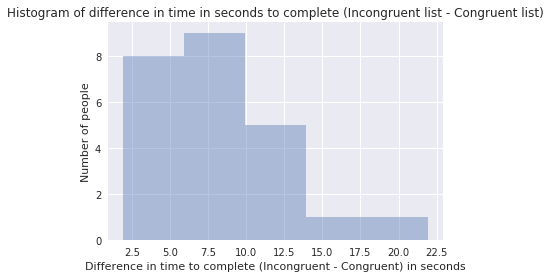

In [40]:
# Plot histogram of differences
plt.title('Histogram of difference in time in seconds to complete (Incongruent list - Congruent list)')
sns.distplot(df['difference'], kde=False)
plt.ylabel('Number of people')
plt.xlabel('Difference in time to complete (Incongruent - Congruent) in seconds')

#### Plot 1: Histogram of time in seconds to complete Congruent list and Incongruent list

Looking at the first histograms we can see that the samples of time to complete the Incongruent list are clustered about 8 seconds greater than the samples of time to complete the Congruent list.

#### Plot 2: Histogram of difference in time in seconds to complete (Incongruent list - Congruent list)

When we plot the histogram of the difference in times by person we also can see that the sample clusters around a 8 second time difference. There are no cases in our sample where someone completed the Incongruent list faster than the Congruent list.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [30]:
# Perform the statistical test here
stats.ttest_rel(df['Incongruent'], df['Congruent'])

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

#### Statistical Test Results

The critical statistic value is t = 8.02.

The confidence level or p-value = 4.1e-08.

For our p-value to indicates that there is a significant difference in the times to complete the Incongruent list vs the Congruent list it had to be below 0.05. It is 6 orders of magnitude below this.

Therefore based on this statistical analysis:

#### We reject the Null Hypothesis.

Based on this test there is a significant difference in the time to complete the Incongruent list vs the Congruent one.

This is what I expected after having taken the test myself and before beginning the analysis.




(6) What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? 

According to Wikipedia there are several theories used to explain the Stroop effect. They are commonly known as ‘race models’ and are based on the underlying notion that both relevant and irrelevant information are processed in parallel, but "race" to enter the single central processor during response selection.

From wikipedia "https://en.wikipedia.org/wiki/Stroop_effect" they are:

#### Processing speed

This theory suggests there is a lag in the brain's ability to recognize the color of the word since the brain reads words faster than it recognizes colors. This is based on the idea that word processing is significantly faster than color processing. In a condition where there is a conflict regarding words and colors (e.g., Stroop test), if the task is to report the color, the word information arrives at the decision-making stage before the color information which presents processing confusion. Conversely, if the task is to report the word, because color information lags after word information, a decision can be made ahead of the conflicting information.

#### Selective attention

The Selective Attention Theory that color recognition as opposed to reading a word, requires more attention, the brain needs to use more attention to recognize a color than to word encoding, so it takes a little longer. The responses lend much to the interference noted in the Stroop task. This may be a result of either an allocation of attention to the responses or to a greater inhibition of distractors that are not appropriate responses.

#### Automaticity

This theory is the most common theory of the Stroop effect. It suggests that since recognizing colors is not an "automatic process" there is hesitancy to respond; whereas, the brain automatically understands the meaning of words as a result of habitual reading. This idea is based on the premise that automatic reading does not need controlled attention, but still uses enough attentional resources to reduce the amount of attention accessible for color information processing. Stirling (1979) introduced the concept of response automaticity. He demonstrated that changing the responses from colored words to letters that were not part of the colored words increased reaction time while reducing Stroop interference.

#### Parallel distributed processing

This theory suggests that as the brain analyzes information, different and specific pathways are developed for different tasks. Some pathways, such as reading, are stronger than others, therefore, it is the strength of the pathway and not the speed of the pathway that is important. In addition, automaticity is a function of the strength of each pathway, hence, when two pathways are activated simultaneously in the Stroop effect, interference occurs between the stronger (word reading) path and the weaker (color naming) path, more specifically when the pathway that leads to the response is the weaker pathway.

One interesting similar phenomenon I researched was the numerical Stroop effect. Which demonstrates the close relationship between numerical values and physical sizes. For example, comparing digits in incongruent trials (e.g., Large 3, small 5) is slower than comparing digits in congruent trials (e.g., Large 5, small 3).

### Resources
References used during this project.

- https://en.wikipedia.org/wiki/Stroop_effect
- https://stackoverflow.com/
- Udacity Data Analyst Nanodegree (Term 1, Term 2)
- Udacity Free Courses (Intro to Descriptive Statistics, Intro to Inferential Statistics)
